**Exploratory Data Analysis (EDA)**
- *Отчет по качеству входных данных*

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [109]:
%matplotlib inline
sns.set_style('whitegrid')

**Загрузка данных в формате .csv**

In [110]:
df = pd.read_csv('Data/_data.csv')

**ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ**

Доступные колонки: (просмотр первых 2-х строк)
- 'ID  объявления', 
- 'Количество комнат', 
- 'Тип', 'Метро', 
- 'Адрес', 
- 'Площадь, м2', 
- 'Дом', 
- 'Парковка', 
- 'Цена', 
- 'Телефоны', 
- 'Описание', 
- 'Ремонт', 
- 'Площадь комнат, м2', 
- 'Балкон', 
- 'Окна', 
- 'Санузел', 
- 'Можно с детьми/животными', 
- 'Дополнительно', 
- 'Название ЖК', 
- 'Серия дома', 
- 'Высота потолков, м', 
- 'Лифт', 
- 'Мусоропровод', 
- 'Ссылка на объявление'

In [111]:
df.head(2)

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126


**Тип данных, пропуски**

In [112]:
total_date = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                23368 non-null  int64  
 1   ID  объявления            23368 non-null  int64  
 2   Количество комнат         22327 non-null  object 
 3   Тип                       23368 non-null  object 
 4   Метро                     22053 non-null  object 
 5   Адрес                     23368 non-null  object 
 6   Площадь, м2               23368 non-null  object 
 7   Дом                       23368 non-null  object 
 8   Парковка                  9951 non-null   object 
 9   Цена                      23368 non-null  object 
 10  Телефоны                  23368 non-null  object 
 11  Описание                  23368 non-null  object 
 12  Ремонт                    20613 non-null  object 
 13  Площадь комнат, м2        14458 non-null  object 
 14  Балкон

In [113]:
df.drop(['ID  объявления', 'Unnamed: 0', 'Ссылка на объявление', 'Телефоны'], axis=1, inplace=True)

In [114]:
df.describe()

,"Высота потолков, м"
count,11206.00000
mean,2.98345
std,7.61472
min,1.20000
25%,2.64000
50%,2.64000
75%,2.80000
max,320.00000


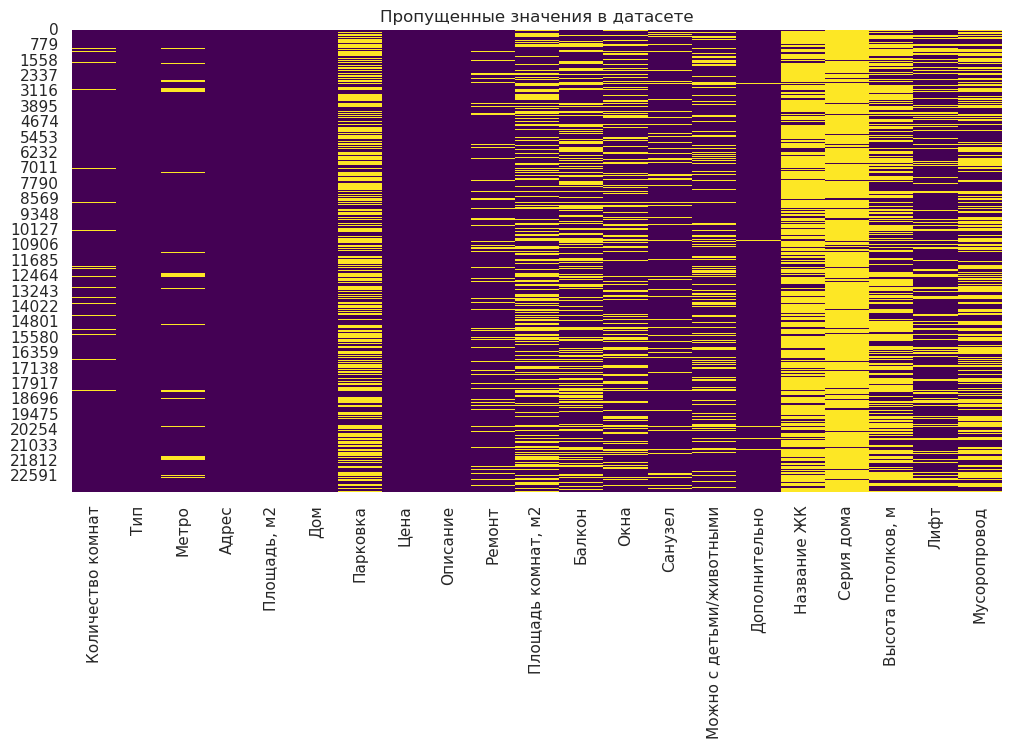

In [115]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Пропущенные значения в датасете')
plt.show()

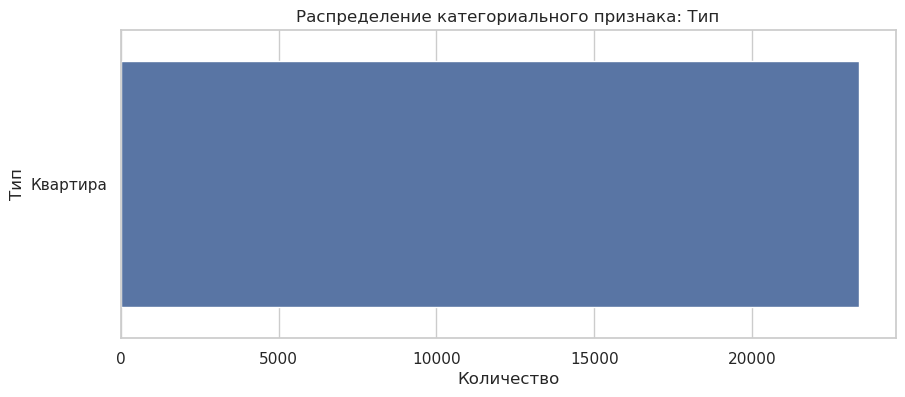

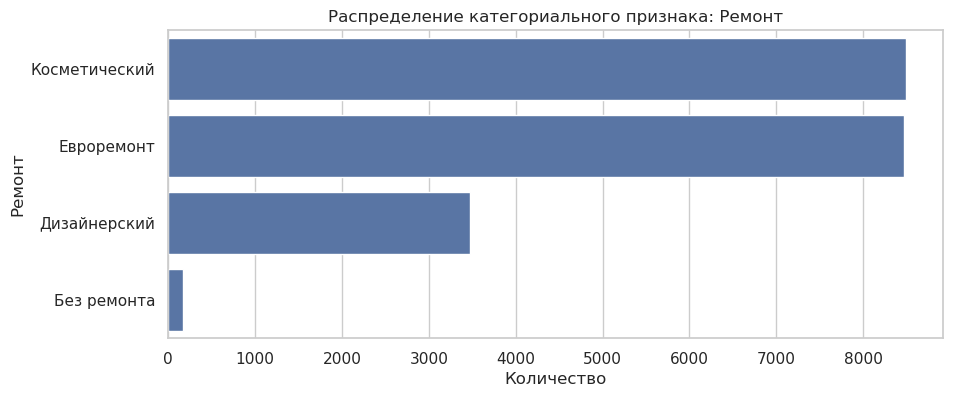

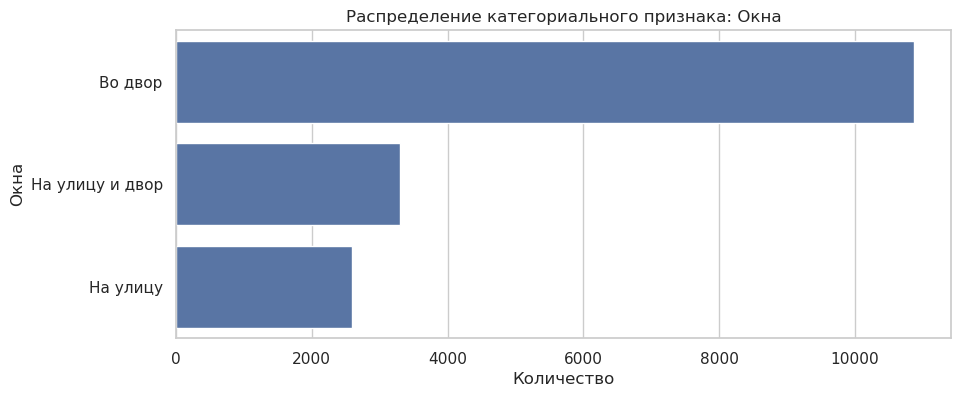

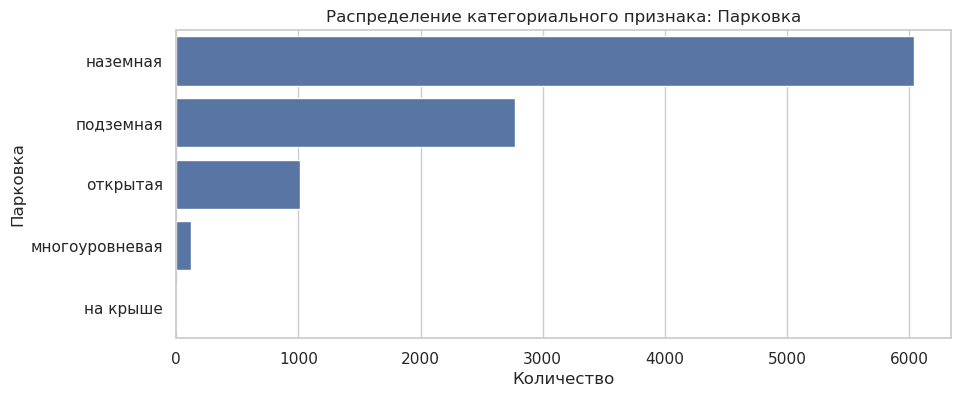

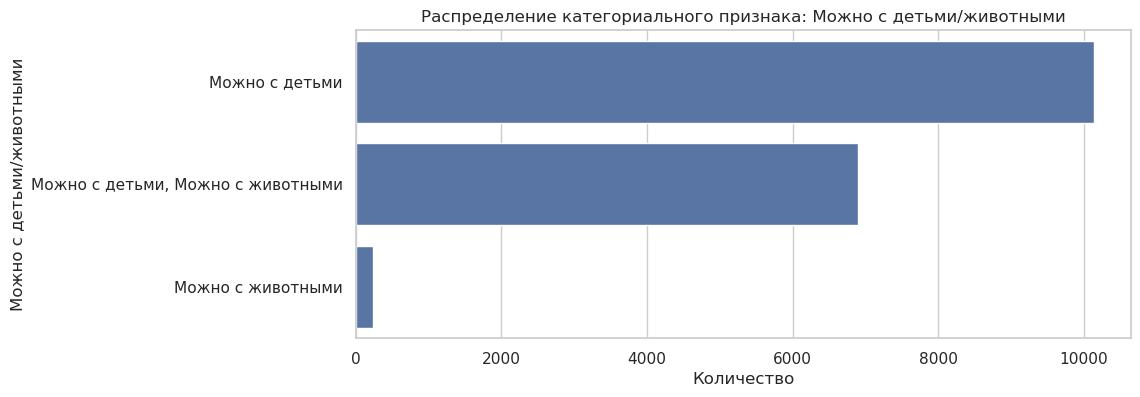

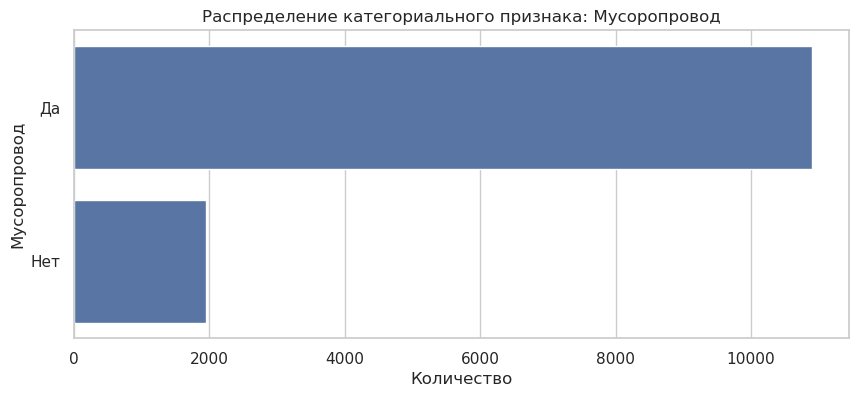

In [116]:
categorical_cols = ['Тип','Ремонт','Окна',
                    'Парковка', 'Можно с детьми/животными', 'Мусоропровод']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Распределение категориального признака: {col}')
    plt.xlabel('Количество')
    plt.ylabel(col)
    plt.show()

In [117]:
# Извлечение числового значения цены
df['Цена'] = df['Цена'].str.extract(r'(\d+\.?\d*)').astype(float)


In [118]:
# Извлечение названия станции метро
df['Метро'] = df['Метро'].str.extract(r'(м\. [^()]+)')

# Удаление лишних пробелов
df['Метро'] = df['Метро'].str.strip()


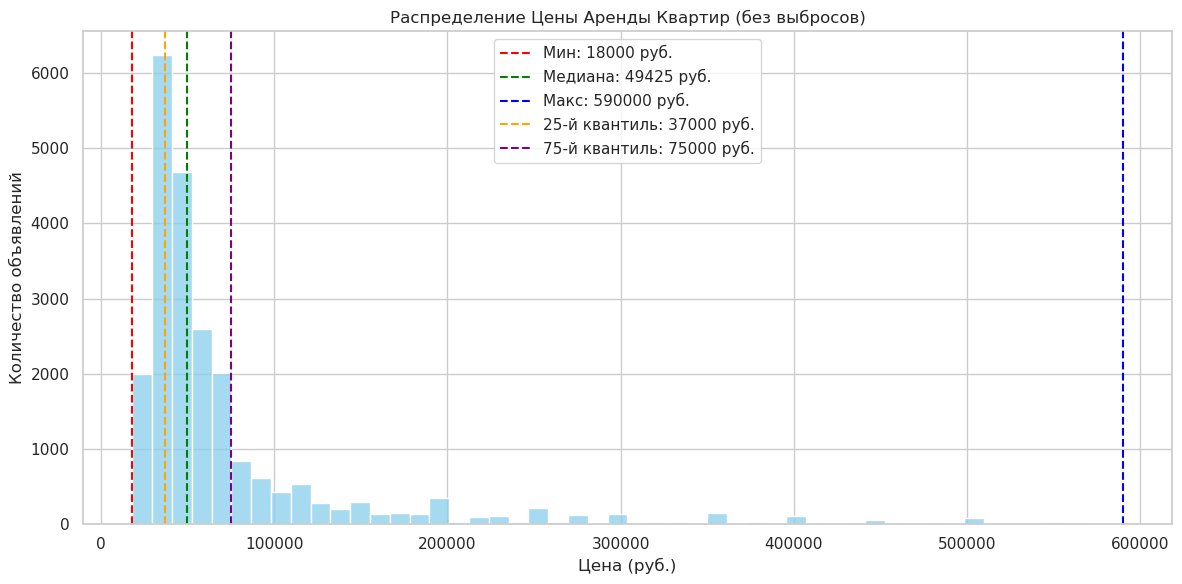

In [119]:
# Очистка данных от выбросов, используя нижний и верхний перцентиль (например, 1% и 99%)
lower_bound = df['Цена'].quantile(0.01)
upper_bound = df['Цена'].quantile(0.99)
filtered_data = df[(df['Цена'] >= lower_bound) & (df['Цена'] <= upper_bound)]

# Построение гистограммы без выбросов
plt.figure(figsize=(12, 6))
sns.histplot(filtered_data['Цена'], bins=50, kde=False, color='skyblue')
plt.title('Распределение Цены Аренды Квартир (без выбросов)')
plt.xlabel('Цена (руб.)')
plt.ylabel('Количество объявлений')

# Вычисление основных статистических показателей для отфильтрованных данных
min_price = filtered_data['Цена'].min()
median_price = filtered_data['Цена'].median()
max_price = filtered_data['Цена'].max()
quantiles = filtered_data['Цена'].quantile([0.25, 0.75])

# Добавление вертикальных линий на график
plt.axvline(min_price, color='red', linestyle='--', label=f'Мин: {min_price:.0f} руб.')
plt.axvline(median_price, color='green', linestyle='--', label=f'Медиана: {median_price:.0f} руб.')
plt.axvline(max_price, color='blue', linestyle='--', label=f'Макс: {max_price:.0f} руб.')
plt.axvline(quantiles[0.25], color='orange', linestyle='--', label=f'25-й квантиль: {quantiles[0.25]:.0f} руб.')
plt.axvline(quantiles[0.75], color='purple', linestyle='--', label=f'75-й квантиль: {quantiles[0.75]:.0f} руб.')

# Отображение легенды
plt.legend()

# Отображение графика
plt.tight_layout()
plt.show()

- Большая часть объявлений приходится на диапазон между 25 и 75 квантилями, что говорит о том, что предложения в этом диапазоне являются самымы частыми и типичными для рынка. 
- Резкий спад на уровне минимальной и максимальной цены указывает на то, что такие значения встречаются реже и являются аномалиями или специфическими предложениями.

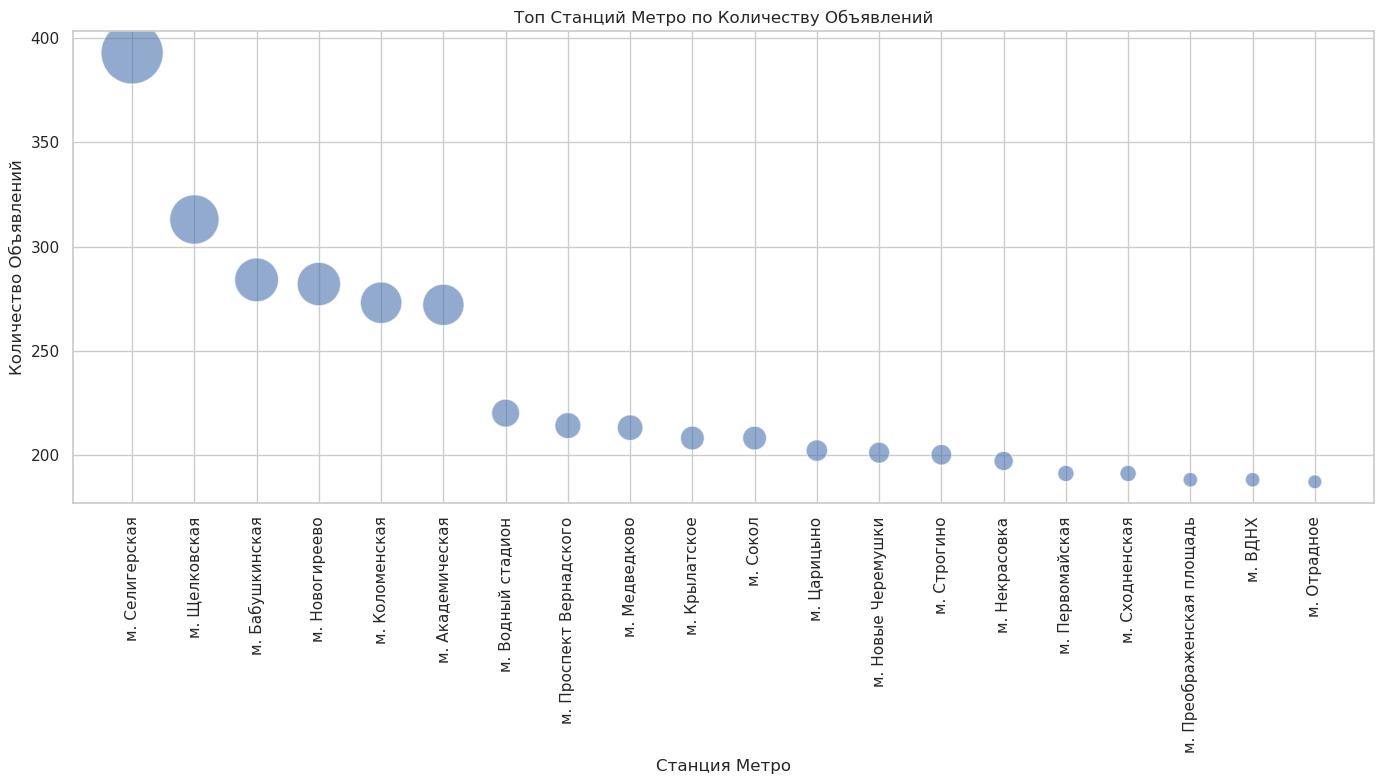

In [120]:
# Выбор топ-20 станций метро
top_metro = metro_counts.head(20)

plt.figure(figsize=(14, 8))
sns.scatterplot(
    x=top_metro['Метро'],
    y=top_metro['Количество объявлений'],
    size=top_metro['Количество объявлений'],
    sizes=(100, 2000),
    alpha=0.6,
    legend=False
)
plt.xticks(rotation=90)
plt.title('Топ Станций Метро по Количеству Объявлений')
plt.xlabel('Станция Метро')
plt.ylabel('Количество Объявлений')
plt.tight_layout()
plt.show()

**КРАТКИЙ АНАЛИЗ КАЧЕСТВА ДАННЫХ**

- Наличие выбросов.
- Пропуски в данных
- Несоответствия типов данных


**РЕКОМЕНДАЦИИ ДЛЯ ДАЛЬНЕЙШЕЙ ОБРАБОТКИ**
- Обработка пропусков
- Удаление или обработка выбросов
- Привести типы данных к соответствию
- Разделить составные признаки